In [1]:
# Get Zoom stock data for 1 or 2 years and plot a trend line. The trend line should be smoothed with Moving Average.

In [2]:
from pandas_datareader import data
zoom_data = data.DataReader('ZM', start='2019', end='2021',data_source='yahoo')
zoom_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000


In [3]:
zoom_close=zoom_data['Close']

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()

In [5]:
def moving_average(x, n, type='simple'):
    import numpy as np
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))
        weights /= weights.sum()
    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a

In [6]:
zoom_close_ma10 = moving_average(zoom_close, 10, 'simple')
zoom_close_ma20 = moving_average(zoom_close, 20, 'simple')

In [7]:
zoom_data.insert(0,'zoom_close_ma10',zoom_close_ma10)
zoom_data.insert(0,'zoom_close_ma20',zoom_close_ma20)

In [8]:
zoom_data.head()

,zoom_close_ma20,zoom_close_ma10,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2019-04-18,1480.110004,697.200001,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,1480.110004,697.200001,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,1480.110004,697.200001,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,1480.110004,697.200001,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,1480.110004,697.200001,66.849998,62.599998,64.739998,65.000000,3863300,65.000000


In [9]:
zoom_close_ma10=zoom_data['zoom_close_ma10']
zoom_close_ma20=zoom_data['zoom_close_ma20']

<AxesSubplot:xlabel='Date'>

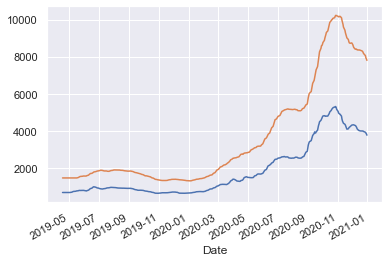

In [11]:
zoom_close_ma10.plot()
zoom_close_ma20.plot()